В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [2]:
import numpy as np
x = non_smoker_df['age'].values
y = non_smoker_df['charges'].values

Метод МНК

In [3]:
X= np.c_[np.ones(len(x)), x]
X

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

In [4]:
def normal_equations(X,y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [5]:
MNK_coefs = normal_equations(X, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [6]:
predictions_MNK = np.dot(X, MNK_coefs)
predictions_MNK[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 array([ 1725.5523 ,  4449.462  , 21984.47061]))

In [8]:
w = MNK_coefs[1]
b = MNK_coefs[0]
error = predictions_MNK - y
rmse = np.sqrt(np.mean(np.square(error)))
print(f" w = {w}", f" b = {b}")
print(f"RMSE Loss: {rmse} ")

 w = 267.2489128311998  b = -2091.4205565650805
RMSE Loss: 4662.505766636395 


In [22]:
# Градієнтний спуск
def full_batch_gradient_descent(x, y, lr=0.0001, epochs=1000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * x + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, x)
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(x, y, lr=0.0001, epochs=1000)
predictions_fbgd_1 = m * x + b

m, b

(np.float64(221.1045843794301), np.float64(-41.98126853149978))

m = 221.1045843794301  b = -41.98126853149978
RMSE Loss fbgd: 4713.250582815521 


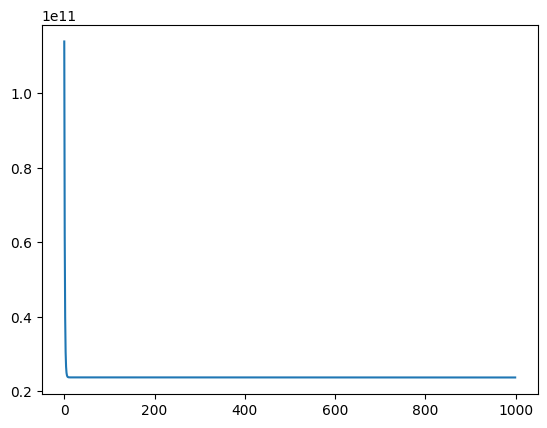

In [23]:
error_fbgd = predictions_fbgd_1 - y
rmse_fbgd = np.sqrt(np.mean(np.square(error_fbgd )))

print(f"m = {m}", f" b = {b}")
print(f"RMSE Loss fbgd: {rmse_fbgd} ")
plt.plot(errors)

In [24]:
# Градієнтний спуск
def full_batch_gradient_descent(x, y, lr=0.0005, epochs=10000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * x + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, x)
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(x, y, lr=0.0005, epochs=10000)
predictions_fbgd_2 = m * x + b

m, b


(np.float64(252.03525579435097), np.float64(-1415.7261106360409))

m = 252.03525579435097  b = -1415.7261106360409
RMSE Loss fbgd: 4668.048463642018 


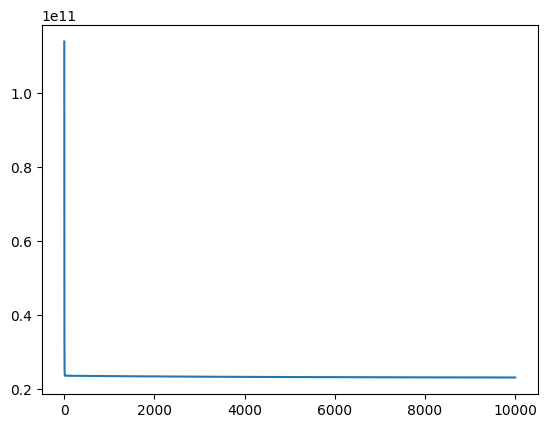

In [25]:
error_fbgd = predictions_fbgd_2 - y
rmse_fbgd = np.sqrt(np.mean(np.square(error_fbgd )))

print(f"m = {m}", f" b = {b}")
print(f"RMSE Loss fbgd: {rmse_fbgd} ")
plt.plot(errors)

In [27]:
# Градієнтний спуск
def full_batch_gradient_descent(x, y, lr=0.00009, epochs=10000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * x + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, x)
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(x, y, lr=0.00009, epochs=1000)
predictions_fbgd_3 = m * x + b

m, b

(np.float64(220.99997822589862), np.float64(-37.33532464174184))

m = 220.99997822589862  b = -37.33532464174184
RMSE Loss fbgd: 4713.479668417624 


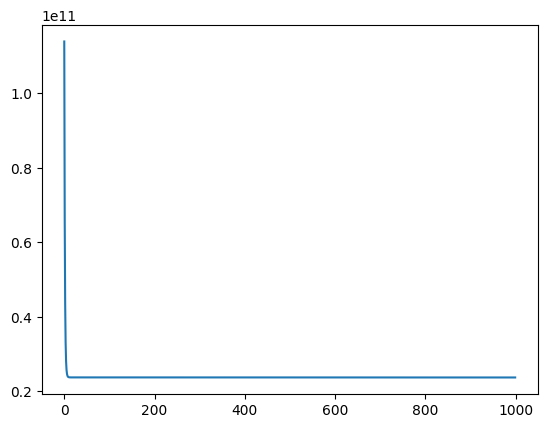

In [28]:
error_fbgd = predictions_fbgd_3 - y
rmse_fbgd = np.sqrt(np.mean(np.square(error_fbgd )))
plt.plot(errors)
print(f"m = {m}", f" b = {b}")
print(f"RMSE Loss fbgd: {rmse_fbgd} ")

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [16]:
lin_reg.fit(X, y)

LinearRegression()

In [17]:
lin_reg.coef_, lin_reg.intercept_

(array([  0.        , 267.24891283]), np.float64(-2091.4205565650827))

In [18]:
predictions_sklearn = lin_reg.predict(X)

In [49]:
error_sklearn = predictions_sklearn  - y
rmse_sklearn  = np.sqrt(np.mean(np.square(error_sklearn  )))
w_sk = lin_reg.coef_[1]
b_sk = lin_reg.intercept_
print(f"m = {w_sk}", f" b = {b_sk}")
print(f"RMSE Loss sklearn: {rmse_sklearn } ")

m = 305.23760210982874  b = 20294.12812691597
RMSE Loss sklearn: 4662.505766636395 


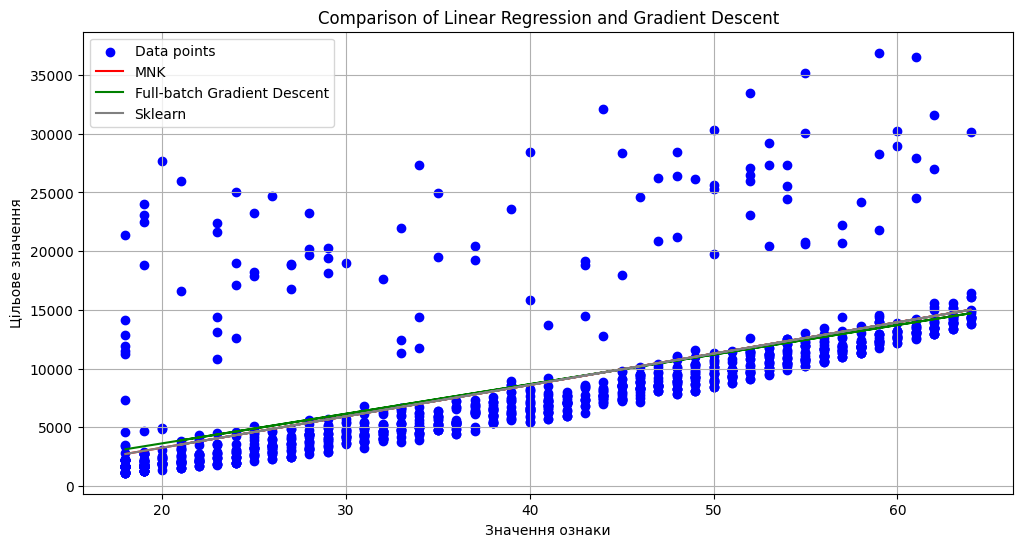

In [33]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 1], y, color='blue', label='Data points')
plt.plot(X[:, 1], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 1], predictions_fbgd_2, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 1], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

Всі 3 методи мають схожі результати

Прогноз розрахований за допомогою бібліотеки scikit-learn відповідає результатам розрахунку MNK і вони мають найменший показник RMSE Loss, хоча і дані отримані за допомогою Full-Batch градієнтного спуску не сильно більші.

Метод Full-Batch градієнтного спуску із обраним learning rate 0.0005 показав найменший показник RMSE Loss серед

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [40]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [44]:
x_s = smoker_df['age'].values
y_s = smoker_df['charges'].values
X_s= np.c_[np.ones(len(x_s)), x_s]


In [45]:
lin_reg = LinearRegression()


In [46]:
lin_reg.fit(X_s, y_s)

LinearRegression()

In [47]:
lin_reg.coef_, lin_reg.intercept_

(array([  0.        , 305.23760211]), np.float64(20294.12812691597))

In [48]:
predictions_sklearn_s = lin_reg.predict(X_s)

In [53]:
error_sklearn_s = predictions_sklearn_s  - y_s
rmse_sklearn_s  = np.sqrt(np.mean(np.square(error_sklearn_s )))
w_ = lin_reg.coef_[1]
b_ = lin_reg.intercept_
print(f"m = {w_}", f" b = {b_}")
print(f"RMSE Loss sklearn: {rmse_sklearn_s } ")

m = 305.23760210982874  b = 20294.12812691597
RMSE Loss sklearn: 10711.00334810241 


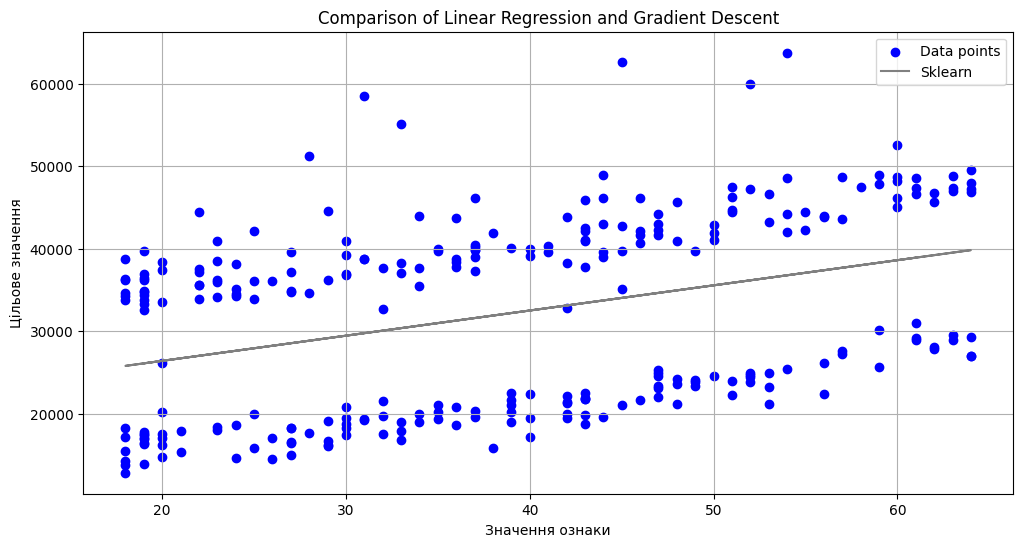

In [55]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X_s[:, 1], y_s, color='blue', label='Data points')
plt.plot(X_s[:, 1], predictions_sklearn_s, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

Отримана модель оцінки розміру медичних зборів для курців за їх віком не є хорошою адже  фактичні дані розділені на 2 групи, а прогноз між ними, тобто для  нижньої групи прогноз буде завищеним, а для 2 навпаки занищеним (тобто можна втратити клієнтів і втратити прибуток компанії).

Також у моделі для курців показник RMSE Loss є значно більший ніж у моделі для не курців.